In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
Obs como nao sei se as pessoas que 
irao baixar esse arquivo vao utilizar
o jupyter-notebook ou mesmo uma
IDLE spyder, por exemplo, entao, resolvi
nao utilizar caracteres especiais nos co
mentarios, pois esses comentarios 
causam erros de compilacao 

'''


'\nObs como nao sei se as pessoas que \nirao baixar esse arquivo vao utilizar\no jupyter-notebook ou mesmo uma\nIDLE spyder, por exemplo, entao, resolvi\nnao utilizar caracteres especiais nos co\nmentarios, pois esses comentarios \ncausam erros de compilacao \n\n'

In [2]:
# Plote grafico
def plote(X, Y, Data, XLab, YLab, Title, intervalo, index):
    plt.figure(index)
    sns.set(style="darkgrid")
    plt.axes()
    plot = sns.lineplot(x = X, y = Y, data = Data)
    plot.set_xlabel(XLab, fontsize = 20)
    plot.set_ylabel(YLab, fontsize = 20)
    count = 0
    label = []
    for index in X:    
        if count % intervalo == 0:
            label.append(index)
        else: 
            label.append('')
        count = count + 1
    plot.set_xticklabels(label, rotation = 90)
    plot.set_title(Title, fontsize = 15)
    plot

In [3]:
# Plote grafico
def plote2(X, Y, Data, XLab, YLab, Title, intervalo, index, *Pico):
    plt.figure(index)
    sns.set(style="darkgrid")
    plt.axes()
    plot = sns.lineplot(x = X, y = Y, data = Data)
    plot.set_xlabel(XLab, fontsize = 20)
    plot.set_ylabel(YLab, fontsize = 20)
    count = 0
    label = []
    for index in X:    
        if count % intervalo == 0:
            label.append(index)
        else: 
            label.append('')
        count = count + 1
    plot.set_xticklabels(label, rotation = 90)
    plot.set_title(Title, fontsize = 15)
    for pico in Pico:
        plt.plot(pico['x'],pico['y'], 'or')
        plt.text(pico['x'],pico['y'], '({})'.format(pico['x'][0]))
    plot

Pegando os Dados - Uma visao geral

In [4]:
# Pick data from train.csv
data = pd.read_csv('train.csv')
data.head(21)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


# Analise Estatistica preliminar

In [5]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
Store = data['Store'].unique()
Dept = data['Dept'].unique()
Date = data['Date'].unique()
Week_Sal = data['Weekly_Sales'].unique()
Is_Holi = data['IsHoliday'].unique()

# Verificando os possiveis valores de cada um dos parametros

In [7]:
print("Lojas:")
print(Store)
print("Departamentos:")
print(Dept)
print("Data:")
print(Date)
print("Vendas:")
print(Week_Sal)
print("EFeriado:")
print(Is_Holi)


Lojas:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Departamentos:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]
Data:
['2010-02-05' '2010-02-12' '2010-02-19' '2010-02-26' '2010-03-05'
 '2010-03-12' '2010-03-19' '2010-03-26' '2010-04-02' '2010-04-09'
 '2010-04-16' '2010-04-23' '2010-04-30' '2010-05-07' '2010-05-14'
 '2010-05-21' '2010-05-28' '2010-06-04' '2010-06-11' '2010-06-18'
 '2010-06-25' '2010-07-02' '2010-07-09' '2010-07-16' '2010-07-23'
 '2010-07-30' '2010-08-06' '2010-08-13' '2010-08-20' '2010-08-27'
 '2010-09-03' '2010-09-10' '2010-09-17' '2010-09-24' '2010-10-01'
 '2010-10-08' '2010-10-15' '2010-10-22' '2010-10-29' '2010-11-05'
 '2010-11-12' '2010-11-19' '2010-11-26' '2010-12-03' '2010

# Primeira Questao

In [8]:
'''
    As vendas totais de cada loja e a soma
    de cada quantidade de vendas em cada 
    departamento.
    
    Assim, pode-se fazer para cada loja uma
    tabela com a soma de vendas dos departamentos
    durante o tempo.
    
    Enfim, pode-se fazer a media dos valores
    de venda nas lojas fixando a data
'''
# Exemplo Data = 2010-02-05 e Store = 1
data[(data['Date'] == '2010-02-05') & (data['Store'] == 1)][['Weekly_Sales']].sum()


Weekly_Sales    1643690.9
dtype: float64

In [9]:
# Vendas totais de cada loja em cada periodo (soma departamento)
Sum_Store_Date = data.groupby(by = ['Store', 'Date'])[['Weekly_Sales']].sum()
Sum_Store_Date.head()

Weekly_Sales
Store Date                    
1     2010-02-05    1643690.90
      2010-02-12    1641957.44
      2010-02-19    1611968.17
      2010-02-26    1409727.59
      2010-03-05    1554806.68

In [10]:
# Media das vendas por periodo
Avg_Date = Sum_Store_Date.groupby(by = 'Date')[['Weekly_Sales']].mean()
Avg_Date.head()

,Weekly_Sales
Date,
2010-02-05,1.105572e+06
2010-02-12,1.074148e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05
2010-03-05,1.041588e+06


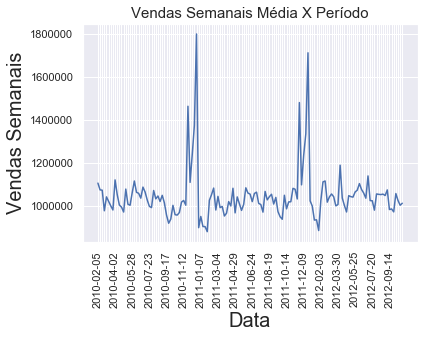

In [11]:
plote(Avg_Date.index, 'Weekly_Sales', 
     Avg_Date, 'Data', 'Vendas Semanais',
     'Vendas Semanais Média X Período',
     8, 1)

In [12]:
# Determinando alguns pontos que parecem relevantes
# Ponto de maximo
maximo = Avg_Date['Weekly_Sales'].max()
data_maximo = Avg_Date.index[ Avg_Date['Weekly_Sales'] == Avg_Date['Weekly_Sales'].max()]
print("A data e vendas semanal de maior amplitude foram")
print(data_maximo , maximo)

A data e vendas semanal de maior amplitude foram
Index(['2010-12-24'], dtype='object', name='Date') 1798475.9022222224


In [13]:
# Verificando o segundo pico
redux = Avg_Date.drop(index = data_maximo)
maximo2 = redux['Weekly_Sales'].max()
data_maximo2 = redux.index[ redux['Weekly_Sales'] == redux['Weekly_Sales'].max()]
print("A data e vendas semanal da segunda maior amplitude foram")
print(data_maximo2 , maximo2)

A data e vendas semanal da segunda maior amplitude foram
Index(['2011-12-23'], dtype='object', name='Date') 1711072.0291111108


In [14]:
# Verificando o terceiro pico
redux2 = redux.drop(index = data_maximo2)
maximo3 = redux2['Weekly_Sales'].max()
data_maximo3 = redux2.index[ redux2['Weekly_Sales'] == redux2['Weekly_Sales'].max()]
print("A data e vendas semanal da segunda maior amplitude foram")
print(data_maximo3 , maximo3)


A data e vendas semanal da segunda maior amplitude foram
Index(['2011-11-25'], dtype='object', name='Date') 1479857.8946666666


In [15]:
# Verificando o quarto pico
redux3 = redux2.drop(index = data_maximo3)
maximo4 = redux3['Weekly_Sales'].max()
data_maximo4 = redux3.index[ redux3['Weekly_Sales'] == redux3['Weekly_Sales'].max()]
print("A data e vendas semanal da segunda maior amplitude foram")
print(data_maximo4 , maximo4)

A data e vendas semanal da segunda maior amplitude foram
Index(['2010-11-26'], dtype='object', name='Date') 1462688.9608888885


A data e vendas semanal de maior amplitude foram
Index(['2010-12-24'], dtype='object', name='Date') 1798475.9022222224
A data e vendas semanal da segunda maior amplitude foram
Index(['2011-12-23'], dtype='object', name='Date') 1711072.0291111108
A data e vendas semanal da terceira maior amplitude foram
Index(['2011-11-25'], dtype='object', name='Date') 1479857.8946666666
A data e vendas semanal da quarta maior amplitude foram
Index(['2010-11-26'], dtype='object', name='Date') 1462688.9608888885


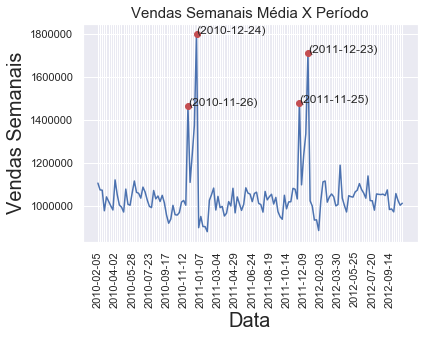

In [16]:
'''
    Resumo
'''
print("A data e vendas semanal de maior amplitude foram")
print(data_maximo , maximo)
print("A data e vendas semanal da segunda maior amplitude foram")
print(data_maximo2 , maximo2)
print("A data e vendas semanal da terceira maior amplitude foram")
print(data_maximo3 , maximo3)
print("A data e vendas semanal da quarta maior amplitude foram")
print(data_maximo4 , maximo4)

pico1 = { 'x': data_maximo, 'y': maximo }
pico2 = { 'x': data_maximo2, 'y': maximo2 }
pico3 = { 'x': data_maximo3, 'y': maximo3 }
pico4 = { 'x': data_maximo4, 'y': maximo4 }
plote2(Avg_Date.index, 'Weekly_Sales', 
     Avg_Date, 'Data', 'Vendas Semanais',
     'Vendas Semanais Média X Período',
     8, 1,pico1, pico2, pico3, pico4)
# Nota-se que as vendas em dezembro de novembro
# Apresentam um boom significativo como esperado
# Uma vez que é próximo ao Natal

In [17]:
data_maximo[0]

'2010-12-24'

# Segunda Questao

In [18]:
'''
    As 10 lojas que melhor performaram
    sao aquelas que apresentam maior
    vendas totais.
'''
# Determinando as lojas que mais venderam

# Vendas totais por loja
Sum_Store = Sum_Store_Date.groupby(by = 'Store')[['Weekly_Sales']].sum()
# Ordenamento das lojas que mais venderam no período analisado
Sum_Store_bst10 = Sum_Store.sort_values(by = 'Weekly_Sales', ascending=False).iloc[0:11,:]
Sum_Store_bst10['Weekly_Sales']

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
Name: Weekly_Sales, dtype: float64

In [19]:
# Separando as lojas que mais venderam
Bst10 = Sum_Store_Date.loc[Sum_Store_bst10['Weekly_Sales'].index]
Bst10
# Média das 10 lojas com maior desempenho
Bst10_Date = Bst10.groupby(by = 'Date').mean()
Bst10_Date.head(10)

,Weekly_Sales
Date,
2010-02-05,1.942374e+06
2010-02-12,1.831163e+06
2010-02-19,1.863170e+06
2010-02-26,1.671337e+06
2010-03-05,1.770717e+06
2010-03-12,1.769946e+06
2010-03-19,1.744452e+06
2010-03-26,1.691709e+06
2010-04-02,1.977615e+06


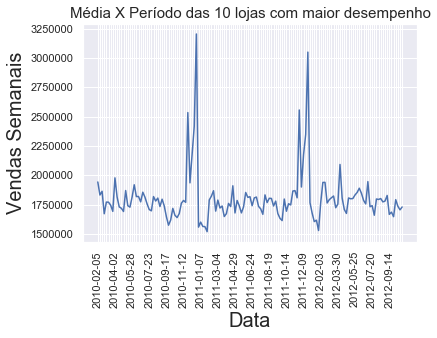

In [20]:

plote(Bst10_Date.index, 'Weekly_Sales', Bst10_Date,
     'Data',
     'Vendas Semanais',
     'Média X Período das 10 lojas com maior desempenho',
      8 , 1)
    

As 10 lojas que melhor performaram
Com respectivo vendas totais no período estudado
       Weekly_Sales
Store              
20     3.013978e+08
4      2.995440e+08
14     2.889999e+08
13     2.865177e+08
2      2.753824e+08
10     2.716177e+08
27     2.538559e+08
6      2.237561e+08
1      2.224028e+08
39     2.074455e+08
19     2.066349e+08


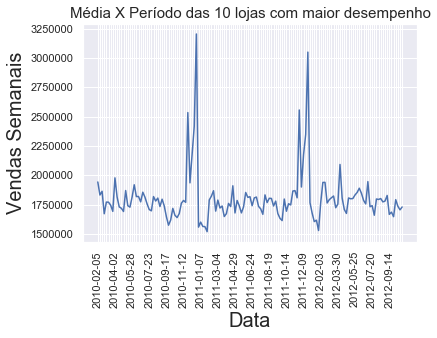

In [21]:
'''
    Resumo
'''
print("As 10 lojas que melhor performaram")
print("Com respectivo vendas totais no período estudado")
print(Sum_Store_bst10)

plote(Bst10_Date.index, 'Weekly_Sales', Bst10_Date,
     'Data',
     'Vendas Semanais',
     'Média X Período das 10 lojas com maior desempenho',
      8 , 1)
# Nota-se que assim como no grafico
# apresentado na questao 1,
# novembro e dezembro são meses que tem uma alta de vendas.
# Nota-se aqui que as medias  
# sao maiores do que do iten anterior, uma vez
# que foram consideradas Apenas as lojas com maiores
# vendas. 


# Terceira Questao

In [22]:
'''
    As 10 lojas que pior performaram
    são aquelas que apresentam menor
    vendas totais.
'''
# Determinando as lojas que mais venderam

# Ordenamento das lojas que mais venderam no período analisado
Sum_Store_worst10 = Sum_Store.sort_values(by = 'Weekly_Sales', ascending=True).iloc[0:11,:]
Sum_Store_worst10['Weekly_Sales']

Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
3     57586735.07
30    62716885.12
37    74202740.32
16    74252425.40
29    77141554.31
9     77789218.99
Name: Weekly_Sales, dtype: float64

In [23]:
# Separando as lojas que menos venderam
Worst10 = Sum_Store_Date.loc[Sum_Store_worst10['Weekly_Sales'].index]
Worst10
# Média das 10 lojas com piores desempenho
Worst10_Date = Worst10.groupby(by = 'Date').mean()
Worst10_Date.head(10)

,Weekly_Sales
Date,
2010-02-05,429744.285455
2010-02-12,427972.290909
2010-02-19,416809.751818
2010-02-26,400703.643636
2010-03-05,419183.420000
2010-03-12,408099.230909
2010-03-19,396675.731818
2010-03-26,399276.957273
2010-04-02,432167.982727


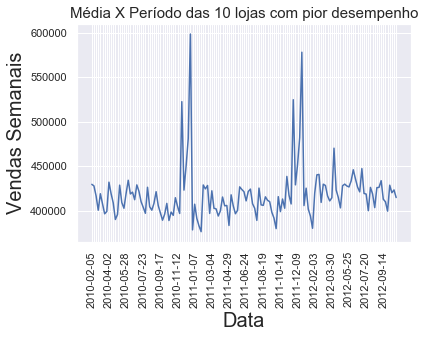

In [24]:
plote(Worst10_Date.index, 'Weekly_Sales', Worst10_Date,
     'Data',
     'Vendas Semanais',
     'Média X Período das 10 lojas com pior desempenho',
      8 , 1)

As 10 lojas que pior performaram foram
Com respectivo vendas totais no período estudado
Store
33    37160221.96
44    43293087.84
5     45475688.90
36    53412214.97
38    55159626.42
3     57586735.07
30    62716885.12
37    74202740.32
16    74252425.40
29    77141554.31
9     77789218.99
Name: Weekly_Sales, dtype: float64


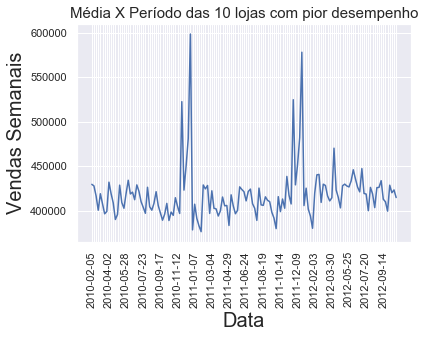

In [25]:
'''
    Resumo
'''
print("As 10 lojas que pior performaram foram")
print("Com respectivo vendas totais no período estudado")
print(Sum_Store_worst10['Weekly_Sales'])

plote(Worst10_Date.index, 'Weekly_Sales', Worst10_Date,
     'Data',
     'Vendas Semanais',
     'Média X Período das 10 lojas com pior desempenho',
      8 , 1)
# Nota-se que assim como no grafico
# apresentado na questao 1,
# novembro de dezembro são meses que tem um boom
# grande. Nota-se aqui que as medias  
# sao menores do que do iten anterior e do que a
# apresentada na questao 1, uma vez
# que foram consideradas Apenas as lojas com piores
# vendas. 

# Quarta Questao

In [26]:
'''
    Primeiramente faturamento com feriados
'''
# Separando o vetor de feriado
Holyday = data[data['IsHoliday'] == True]
Holyday.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
1,1,1,2010-02-12,46039.49,True
31,1,1,2010-09-10,18194.74,True
42,1,1,2010-11-26,18820.29,True
47,1,1,2010-12-31,19124.58,True
53,1,1,2011-02-11,37887.17,True


In [27]:
# Vendas totais de cada loja em cada período (Feriado) - Soma dos departamentos
Sum_Store_Date_Holy = Holyday.groupby(by = ['Store', 'Date'])[['Weekly_Sales']].sum()
Sum_Store_Date_Holy.head()

Weekly_Sales
Store Date                    
1     2010-02-12    1641957.44
      2010-09-10    1507460.69
      2010-11-26    1955624.11
      2010-12-31    1367320.01
      2011-02-11    1649614.93

In [28]:
Avg_Store_Holy = Sum_Store_Date_Holy.groupby(by = ['Store'])[['Weekly_Sales']].mean()
Med_Store_Holy = Sum_Store_Date_Holy.groupby(by = ['Store'])[['Weekly_Sales']].median()
# Desempenho medio de cada loja
print(Avg_Store_Holy.sort_values(by = 'Weekly_Sales', ascending=False).head())
# Mediana do desempenho de cada loja
print(Med_Store_Holy.sort_values(by = 'Weekly_Sales', ascending=False).head())

       Weekly_Sales
Store              
20      2249035.081
4       2243102.624
14      2120582.998
10      2113755.949
13      2113043.806
       Weekly_Sales
Store              
4       2156476.005
20      2094818.480
14      2028830.635
10      2023049.340
2       2001049.875


In [29]:
# Média de vendas das lojas para cada periodo (Feriado)
Avg_Store_Date_Holy = Sum_Store_Date_Holy.groupby(by = ['Date'])[['Weekly_Sales']].mean()
Avg_Store_Date_Holy.head()

,Weekly_Sales
Date,
2010-02-12,1.074148e+06
2010-09-10,1.014098e+06
2010-11-26,1.462689e+06
2010-12-31,8.985004e+05
2011-02-11,1.051915e+06


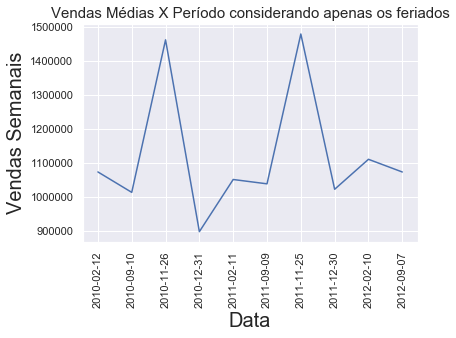

In [30]:
plote(Avg_Store_Date_Holy.index, 'Weekly_Sales', Avg_Store_Date_Holy,
     'Data',
     'Vendas Semanais',
     'Vendas Médias X Período considerando apenas os feriados',
      1 , 1)

In [31]:
NotHolyday = data[data['IsHoliday'] == False]
NotHolyday.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False


In [32]:
# Vendas totais de cada loja em cada período (Sem Feriado)
Sum_Store_Date_NHoly = NotHolyday.groupby(by = ['Store', 'Date'])[['Weekly_Sales']].sum()
Sum_Store_Date_NHoly.head()

Weekly_Sales
Store Date                    
1     2010-02-05    1643690.90
      2010-02-19    1611968.17
      2010-02-26    1409727.59
      2010-03-05    1554806.68
      2010-03-12    1439541.59

In [33]:
Avg_Store_NHoly = Sum_Store_Date_NHoly.groupby(by = ['Store'])[['Weekly_Sales']].mean()
Med_Store_NHoly = Sum_Store_Date_NHoly.groupby(by = ['Store'])[['Weekly_Sales']].median()
# Desempenho medio de cada loja (dia normal / sem feriado)
Media = Avg_Store_NHoly.sort_values(by = 'Weekly_Sales', ascending=False)
print(Media.head())
# Mediana do desempenho de cada loja (dia normal / sem feriado)
Mediana = Med_Store_NHoly.sort_values(by = 'Weekly_Sales', ascending=False)
print(Mediana.head())

       Weekly_Sales
Store              
20     2.097048e+06
4      2.083556e+06
14     2.013489e+06
13     1.995393e+06
2      1.914209e+06
       Weekly_Sales
Store              
4        2065377.15
20       2052246.40
14       2004330.30
13       1956813.31
2        1876788.15


In [34]:
# Media de vendas das lojas para cada periodo (Sem Feriado)
Avg_Store_Date_NHoly = Sum_Store_Date_NHoly.groupby(by = ['Date'])[['Weekly_Sales']].mean()
Avg_Store_Date_NHoly.head()

,Weekly_Sales
Date,
2010-02-05,1.105572e+06
2010-02-19,1.072822e+06
2010-02-26,9.770794e+05
2010-03-05,1.041588e+06
2010-03-12,1.020564e+06


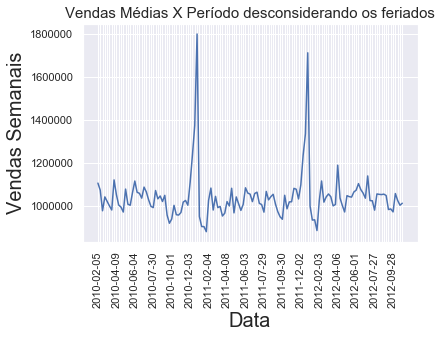

In [35]:
plote(Avg_Store_Date_NHoly.index, 'Weekly_Sales', Avg_Store_Date_NHoly,
     'Data',
     'Vendas Semanais',
     'Vendas Médias X Período desconsiderando os feriados',
      8, 1)

       Weekly_Sales
Store              
20      2249035.081
4       2243102.624
14      2120582.998
10      2113755.949
13      2113043.806
       Weekly_Sales
Store              
4       2156476.005
20      2094818.480
14      2028830.635
10      2023049.340
2       2001049.875


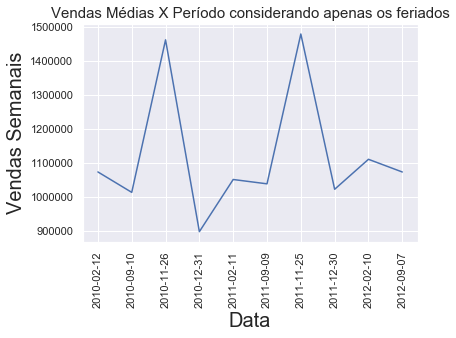

In [36]:
'''
    Resumo Vendas no Feriado
'''
# Desempenho medio de cada loja
Avg = Avg_Store_Holy.sort_values(by = 'Weekly_Sales', ascending=False)
print(Avg.head())
# Mediana do desempenho de cada loja
Med = Med_Store_Holy.sort_values(by = 'Weekly_Sales', ascending=False)
print(Med.head())
plote(Avg_Store_Date_Holy.index, 'Weekly_Sales', Avg_Store_Date_Holy,
     'Data',
     'Vendas Semanais',
     'Vendas Médias X Período considerando apenas os feriados',
      1, 1 )



       Weekly_Sales
Store              
20     2.097048e+06
4      2.083556e+06
14     2.013489e+06
13     1.995393e+06
2      1.914209e+06
       Weekly_Sales
Store              
4        2065377.15
20       2052246.40
14       2004330.30
13       1956813.31
2        1876788.15


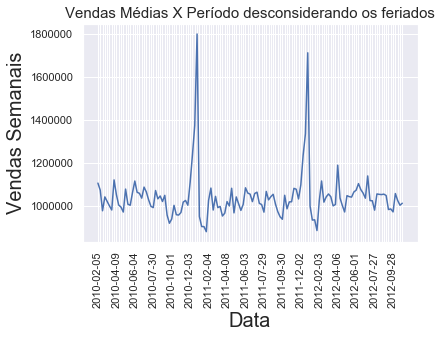

In [37]:
'''
    Resumo Dia Normal
'''

'''
    Pode-se notar que o duplo pico apresentado no grafico 
    da questao 1 nao aparece mais no grafico de vendas medias
    em dias normais, portanto, o pico apresentado por volta 
    de 25/26 de novembro. e um feriado americano, pesquisando
    na internet, verifiquei que nessa data (proxima a ela) 
    e o feriado de acao de gracas -Black Friday
    (quarta quinta-feira de novembro).
    
'''

# Desempenho medio de cada loja em um dia normal
Avg = Avg_Store_NHoly.sort_values(by = 'Weekly_Sales', ascending=False)
print(Avg.head())
# Mediana do desempenho de cada loja em um dia normal
Med = Med_Store_NHoly.sort_values(by = 'Weekly_Sales', ascending=False)
print(Med.head())
plote(Avg_Store_Date_NHoly.index, 'Weekly_Sales', Avg_Store_Date_NHoly,
     'Data',
     'Vendas Semanais',
     'Vendas Médias X Período desconsiderando os feriados',
      8, 1)

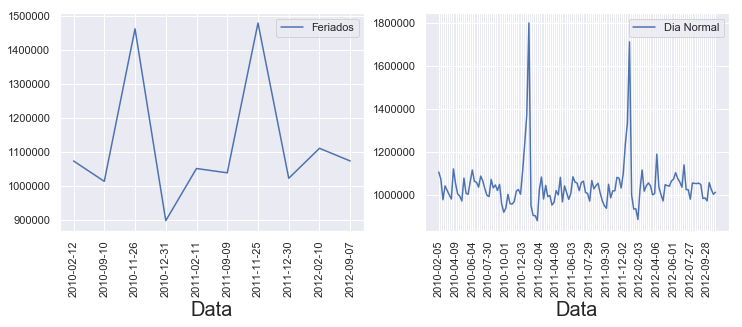

In [38]:
'''
    Feriado Bom ou Ruim?
    Vamos colocar os graficos 
    lado a lado primeiro
'''
fig = plt.figure(1)
fig.set_size_inches(12,4)
sns.set(style="darkgrid")

plt.subplot(1, 2, 1)
plot = sns.lineplot(x = Avg_Store_Date_Holy.index, 
    y = 'Weekly_Sales', 
        data = Avg_Store_Date_Holy)

count = 0
label = []
for index in Avg_Store_Date_Holy.index:    
    if count % 1 == 0:
        label.append(index)
    else: 
        label.append('')
    count = count + 1
plot.set_xticklabels(label, rotation = 90)
plot.set_xlabel('Data', fontsize = 20)
plot.set_ylabel('', fontsize = 20)
plt.legend(('Feriados', 'Normal'),
           loc='upper right')

plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
plot = sns.lineplot(x = Avg_Store_Date_NHoly.index, 
    y = 'Weekly_Sales', 
        data = Avg_Store_Date_NHoly)

plot.set_xlabel('Data', fontsize = 20)
plot.set_ylabel('', fontsize = 20)
count = 0
label = []
for index in Avg_Store_Date_NHoly.index:    
    if count % 8 == 0:
        label.append(index)
    else: 
        label.append('')
    count = count + 1
plot.set_xticklabels(label, rotation = 90)
plt.legend(('Dia Normal', 'Feriado'),
           loc='upper right')



Text(0.5, 1.0, 'Boxplot dia normal')

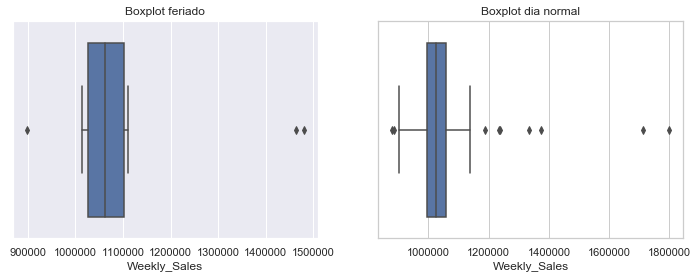

In [39]:
'''
    Ao inves de verificar a media de 
    cada um dos graficos e verificar qual
    deles apresenta maior media, achei que fosse
    mais justo retirar os picos seja 
    do grafico apresentado como dia
    normal como do grafico apresentado como
    dia com feriado e depois calcular a media.
    Acredito que seja  mais razoavel para a 
    analise, pois esses pontos apresentam valores
    bem acima da media como se pode verificar
    nos graficos. Inicialmente vamos analisar
    quais pontos estao fora do intervalo de
    confianca
'''
fig = plt.figure(1)
fig.set_size_inches(12,4)

plt.subplot(1, 2, 1)
sns.set(style="whitegrid")
plot = sns.boxplot(x=Avg_Store_Date_Holy["Weekly_Sales"])
plt.title('Boxplot feriado')

plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
plot = sns.boxplot(x=Avg_Store_Date_NHoly["Weekly_Sales"])
plt.title('Boxplot dia normal')

In [40]:
def RetiraPicoAlto(Avg, retira):
    Avg_RN = Avg.copy()
    maximo = Avg_RN['Weekly_Sales'].max()
    data_maximo = Avg_RN.index[ Avg_RN['Weekly_Sales'] ==
                        Avg_RN['Weekly_Sales'].max()]
    print("A data e vendas semanal da %s maior amplitude foram" %('1'))
    print(data_maximo , maximo)
    for count in range(0, retira):
        # Retirando o primeiro pico (Dia normal)
        maximo_normal = Avg_RN.index[ Avg_RN['Weekly_Sales'] == 
                     Avg_RN['Weekly_Sales'].max()]

        Avg_RN = Avg_RN.drop(index = maximo_normal)
        maximo = Avg_RN['Weekly_Sales'].max()
        data_maximo = Avg_RN.index[ Avg_RN['Weekly_Sales'] ==
                            Avg_RN['Weekly_Sales'].max()]
        print("A data e vendas semanal da %s maior amplitude foram" %(count + 2))
        print(data_maximo , maximo)
    return Avg_RN

def RetiraPicoBaixo(Avg, retira):
    Avg_RN = Avg.copy()
    minimo = Avg_RN['Weekly_Sales'].min()
    data_minimo = Avg_RN.index[ Avg_RN['Weekly_Sales'] ==
                        Avg_RN['Weekly_Sales'].min()]
    print("A data e vendas semanal da %s menor amplitude foram" %('1'))
    print(data_minimo , minimo)
    
    for count in range(0, retira):
        # Retirando o primeiro pico (Dia normal)
        minimo_normal = Avg_RN.index[ Avg_RN['Weekly_Sales'] == 
                     Avg_RN['Weekly_Sales'].min()]

        Avg_RN = Avg_RN.drop(index = minimo_normal)
        minimo = Avg_RN['Weekly_Sales'].min()
        data_minimo = Avg_RN.index[ Avg_RN['Weekly_Sales'] ==
                            Avg_RN['Weekly_Sales'].min()]
        print("A data e vendas semanal da %s menor amplitude foram" %(count + 2))
        print(data_minimo , minimo)
    return Avg_RN

In [41]:
# Retirando ate o sexto pico (Com feriado)    
Avg_Store_Date_Holy_R2 = RetiraPicoAlto(Avg_Store_Date_Holy, 2)

# Retirando ate o segundo pico (Com feriado)    
Avg_Store_Date_Holy_R2 = RetiraPicoBaixo(Avg_Store_Date_Holy_R2, 2)

A data e vendas semanal da 1 maior amplitude foram
Index(['2011-11-25'], dtype='object', name='Date') 1479857.8946666666
A data e vendas semanal da 2 maior amplitude foram
Index(['2010-11-26'], dtype='object', name='Date') 1462688.9608888885
A data e vendas semanal da 3 maior amplitude foram
Index(['2012-02-10'], dtype='object', name='Date') 1111320.176
A data e vendas semanal da 1 menor amplitude foram
Index(['2010-12-31'], dtype='object', name='Date') 898500.4222222221
A data e vendas semanal da 2 menor amplitude foram
Index(['2010-09-10'], dtype='object', name='Date') 1014097.7297777778
A data e vendas semanal da 3 menor amplitude foram
Index(['2011-12-30'], dtype='object', name='Date') 1023165.8008888889


In [42]:
# Retirando ate o setimo pico (Com feriado)    
Avg_Store_Date_NHoly_R = RetiraPicoAlto(Avg_Store_Date_NHoly, 7)

# Retirando ate o segundo pico (Com feriado)    
Avg_Store_Date_NHoly_R = RetiraPicoBaixo(Avg_Store_Date_NHoly_R, 2)

A data e vendas semanal da 1 maior amplitude foram
Index(['2010-12-24'], dtype='object', name='Date') 1798475.9022222224
A data e vendas semanal da 2 maior amplitude foram
Index(['2011-12-23'], dtype='object', name='Date') 1711072.0291111108
A data e vendas semanal da 3 maior amplitude foram
Index(['2010-12-17'], dtype='object', name='Date') 1373795.5522222223
A data e vendas semanal da 4 maior amplitude foram
Index(['2011-12-16'], dtype='object', name='Date') 1335237.6875555555
A data e vendas semanal da 5 maior amplitude foram
Index(['2010-12-10'], dtype='object', name='Date') 1237039.3420000004
A data e vendas semanal da 6 maior amplitude foram
Index(['2011-12-09'], dtype='object', name='Date') 1234692.1711111108
A data e vendas semanal da 7 maior amplitude foram
Index(['2012-04-06'], dtype='object', name='Date') 1188940.3526666663
A data e vendas semanal da 8 maior amplitude foram
Index(['2012-07-06'], dtype='object', name='Date') 1138956.041777778
A data e vendas semanal da 1 meno

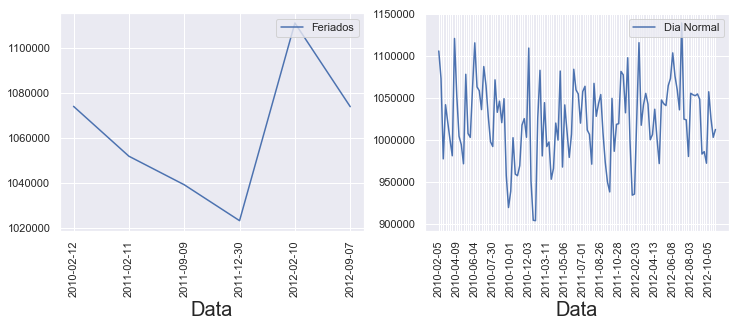

In [43]:
'''
    Novos Gráficos
    sem os picos muito acima
    do normal
'''

fig = plt.figure(1)
fig.set_size_inches(12,4)
sns.set(style="darkgrid")

plt.subplot(1, 2, 1)
plot = sns.lineplot(x = Avg_Store_Date_Holy_R2.index, 
    y = 'Weekly_Sales', 
        data = Avg_Store_Date_Holy_R2)

count = 0
label = []
for index in Avg_Store_Date_Holy_R2.index:    
    if count % 1 == 0:
        label.append(index)
    else: 
        label.append('')
    count = count + 1
plot.set_xticklabels(label, rotation = 90)
plot.set_xlabel('Data', fontsize = 20)
plot.set_ylabel('', fontsize = 20)
plt.legend(('Feriados', 'Normal'),
           loc='upper right')

plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
plot = sns.lineplot(x = Avg_Store_Date_NHoly_R.index, 
    y = 'Weekly_Sales', 
        data = Avg_Store_Date_NHoly_R)

plot.set_xlabel('Data', fontsize = 20)
plot.set_ylabel('', fontsize = 20)
count = 0
label = []
for index in Avg_Store_Date_NHoly_R.index:    
    if count % 8 == 0:
        label.append(index)
    else: 
        label.append('')
    count = count + 1
plot.set_xticklabels(label, rotation = 90)
plt.legend(('Dia Normal', 'Feriado'),
           loc='upper right')

Text(0.5, 1.0, 'Boxplot dia normal')

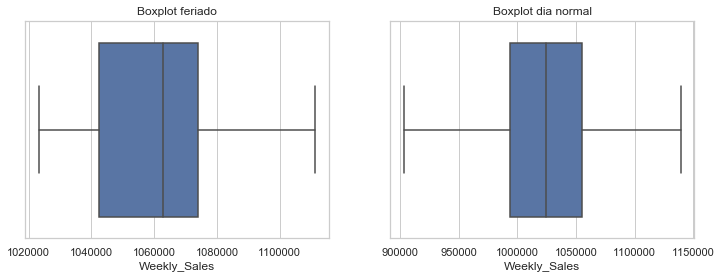

In [44]:
'''
    Verificando novo Boxplot
    obtido
'''

fig = plt.figure(1)
fig.set_size_inches(12,4)

sns.set(style="whitegrid")
plt.subplot(1, 2, 1)
plot = sns.boxplot(x=Avg_Store_Date_Holy_R2["Weekly_Sales"])
plt.title('Boxplot feriado')

plt.subplot(1, 2, 2)
sns.set(style="whitegrid")
plot = sns.boxplot(x=Avg_Store_Date_NHoly_R["Weekly_Sales"])
plt.title('Boxplot dia normal')

In [45]:
'''
    Nota-se que a media e maior nos feriados
    do que nos dias normais
''' 
print('Media feriado:', Avg_Store_Date_Holy_R2.mean())
print('Media dia normal:', Avg_Store_Date_NHoly_R.mean())
print('Feriado apresenta media maior')


Media feriado: Weekly_Sales    1062288.986
dtype: float64
Media dia normal: Weekly_Sales    1.022924e+06
dtype: float64
Feriado apresenta media maior


# Bonus

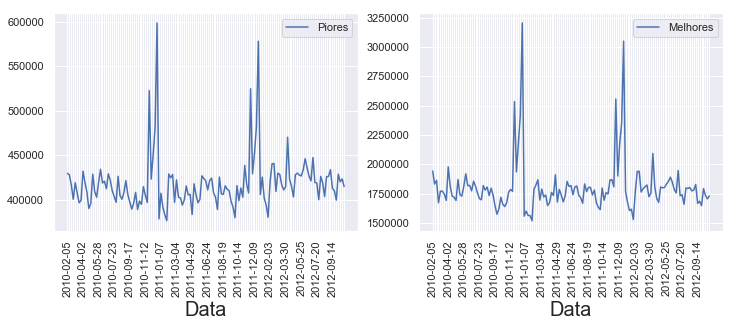

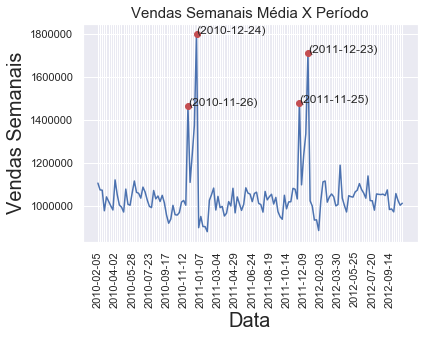

In [46]:
'''
    Vamos colocar primeiro
    os graficos lado a lado
'''
'''
    Novos Gráficos
    sem os picos muito acima
    do normal
'''

fig = plt.figure(1)
fig.set_size_inches(12,4)
sns.set(style="darkgrid")

plt.subplot(1, 2, 1)
plot = sns.lineplot(x = Worst10_Date.index, 
    y = 'Weekly_Sales', 
        data = Worst10_Date)

count = 0
label = []
for index in Worst10_Date.index:    
    if count % 8 == 0:
        label.append(index)
    else: 
        label.append('')
    count = count + 1
plot.set_xticklabels(label, rotation = 90)
plot.set_xlabel('Data', fontsize = 20)
plot.set_ylabel('', fontsize = 20)
plt.legend(('Piores', 'Melhores', 'Medio'),
           loc='upper right')

plt.subplot(1, 2, 2)
sns.set(style="darkgrid")
plot = sns.lineplot(x = Bst10_Date.index, 
    y = 'Weekly_Sales', 
        data = Bst10_Date)

plot.set_xlabel('Data', fontsize = 20)
plot.set_ylabel('', fontsize = 20)
count = 0
label = []
for index in Bst10_Date.index:    
    if count % 8 == 0:
        label.append(index)
    else: 
        label.append('')
    count = count + 1
plot.set_xticklabels(label, rotation = 90)
plt.legend(('Melhores', 'Piores', 'Medio'),
           loc='upper right')

pico1 = { 'x': data_maximo, 'y': maximo }
pico2 = { 'x': data_maximo2, 'y': maximo2 }
pico3 = { 'x': data_maximo3, 'y': maximo3 }
pico4 = { 'x': data_maximo4, 'y': maximo4 }
plote2(Avg_Date.index, 'Weekly_Sales', 
     Avg_Date, 'Data', 'Vendas Semanais',
     'Vendas Semanais Média X Período',
     8, 2,pico1, pico2, pico3, pico4)


In [47]:
'''
    Nota-se um comportamento muito similar
    entre os graficos (de 1 a 3) sendo facilmente
    notado, pela ordem de grandeza das vendas,  
    que o primeiro (ponta esquerda) apresenta
    piores resultados o segundo
    (ponta direita) apresenta o melhor resultado
    ja que sao os 10 que mais venderam e o ultimo
    um intermediario entre os graficos 1 e 2.
    Notando que as vendas crescem principalmente
    no natal e no dia de acao de graca

'''

'\n    Nota-se um comportamento muito similar\n    entre os graficos (de 1 a 3) sendo facilmente\n    notado, pela ordem de grandeza das vendas,  \n    que o primeiro (ponta esquerda) apresenta\n    piores resultados o segundo\n    (ponta direita) apresenta o melhor resultado\n    ja que sao os 10 que mais venderam e o ultimo\n    um intermediario entre os graficos 1 e 2.\n    Notando que as vendas crescem principalmente\n    no natal e no dia de acao de graca\n\n'

In [48]:
'''
    Vamos reaproveitar as funcoes
    RetiraPicoAlto e RetiraPicoBaixo
    para verificar as datas dos acontecimentos
    dos maiores e menores picos de cada um dos 
    tres graficos apresentados anteriormente
'''    

'\n    Vamos reaproveitar as funcoes\n    RetiraPicoAlto e RetiraPicoBaixo\n    para verificar as datas dos acontecimentos\n    dos maiores e menores picos de cada um dos \n    tres graficos apresentados anteriormente\n'

# 10 Piores lojas

A data e vendas semanal da 1 maior amplitude foram
Index(['2010-12-24'], dtype='object', name='Date') 598428.7127272728
A data e vendas semanal da 2 maior amplitude foram
Index(['2011-12-23'], dtype='object', name='Date') 577972.7790909092
A data e vendas semanal da 3 maior amplitude foram
Index(['2011-11-25'], dtype='object', name='Date') 524685.1872727274
A data e vendas semanal da 4 maior amplitude foram
Index(['2010-11-26'], dtype='object', name='Date') 522500.1163636363
A data e vendas semanal da 5 maior amplitude foram
Index(['2011-12-16'], dtype='object', name='Date') 482169.49727272725
A data e vendas semanal da 6 maior amplitude foram
Index(['2010-12-17'], dtype='object', name='Date') 481108.09
A data e vendas semanal da 7 maior amplitude foram
Index(['2012-04-06'], dtype='object', name='Date') 470289.08909090905
A data e vendas semanal da 8 maior amplitude foram
Index(['2011-12-09'], dtype='object', name='Date') 451901.1590909091
A data e vendas semanal da 1 menor amplitude f

Text(0.5, 1.0, 'Boxplot das 10 piores vendas (sem picos)')

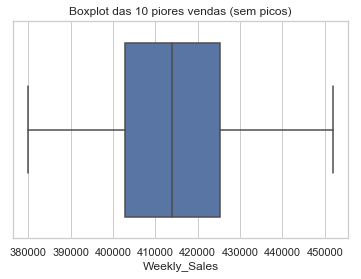

In [49]:

# Retirando ate o setimo pico do vetor com as lojas 
# com menor performace
Worst10_Date_R = RetiraPicoAlto(Worst10_Date, 7)

# Retirando ate o segundo pico  do vetor com as lojas     
# com menor performace
Worst10_Date_R = RetiraPicoBaixo(Worst10_Date_R, 2)

sns.set(style="whitegrid")
plot = sns.boxplot(x=Worst10_Date_R["Weekly_Sales"])
plt.title('Boxplot das 10 piores vendas (sem picos)')


# 10 melhores lojas

A data e vendas semanal da 1 maior amplitude foram
Index(['2010-12-24'], dtype='object', name='Date') 3205494.4518181826
A data e vendas semanal da 2 maior amplitude foram
Index(['2011-12-23'], dtype='object', name='Date') 3050766.89
A data e vendas semanal da 3 maior amplitude foram
Index(['2011-11-25'], dtype='object', name='Date') 2556897.3672727277
A data e vendas semanal da 4 maior amplitude foram
Index(['2010-11-26'], dtype='object', name='Date') 2534690.473636363
A data e vendas semanal da 5 maior amplitude foram
Index(['2010-12-17'], dtype='object', name='Date') 2418192.2063636365
A data e vendas semanal da 6 maior amplitude foram
Index(['2011-12-16'], dtype='object', name='Date') 2349316.9645454544
A data e vendas semanal da 7 maior amplitude foram
Index(['2010-12-10'], dtype='object', name='Date') 2181259.29909091
A data e vendas semanal da 8 maior amplitude foram
Index(['2011-12-09'], dtype='object', name='Date') 2174666.4472727273
A data e vendas semanal da 1 menor amplitud

Text(0.5, 1.0, 'Boxplot das 10 melhores vendas (sem picos)')

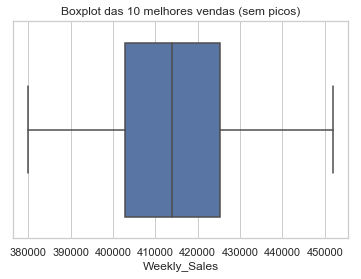

In [50]:
# Retirando ate o setimo pico do vetor com as lojas 
# com maior performace
Bst10_Date_R = RetiraPicoAlto(Bst10_Date, 7)

# Retirando ate o segundo pico  do vetor com as lojas     
# com maior performace
Bst10_Date_R = RetiraPicoBaixo(Bst10_Date_R, 2)

sns.set(style="whitegrid")
plot = sns.boxplot(x=Worst10_Date_R["Weekly_Sales"])
plt.title('Boxplot das 10 melhores vendas (sem picos)')



# Utilizando todas lojas

A data e vendas semanal da 1 maior amplitude foram
Index(['2010-12-24'], dtype='object', name='Date') 1798475.9022222224
A data e vendas semanal da 2 maior amplitude foram
Index(['2011-12-23'], dtype='object', name='Date') 1711072.0291111108
A data e vendas semanal da 3 maior amplitude foram
Index(['2011-11-25'], dtype='object', name='Date') 1479857.8946666666
A data e vendas semanal da 4 maior amplitude foram
Index(['2010-11-26'], dtype='object', name='Date') 1462688.9608888885
A data e vendas semanal da 5 maior amplitude foram
Index(['2010-12-17'], dtype='object', name='Date') 1373795.5522222223
A data e vendas semanal da 6 maior amplitude foram
Index(['2011-12-16'], dtype='object', name='Date') 1335237.6875555555
A data e vendas semanal da 7 maior amplitude foram
Index(['2010-12-10'], dtype='object', name='Date') 1237039.3420000004
A data e vendas semanal da 8 maior amplitude foram
Index(['2011-12-09'], dtype='object', name='Date') 1234692.1711111108
A data e vendas semanal da 9 mai

Text(0.5, 1.0, 'Boxplot das vendas (sem picos)')

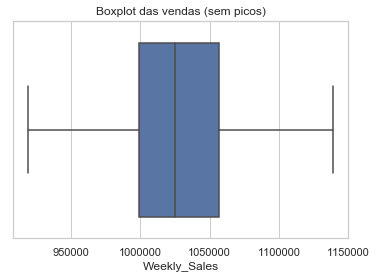

In [51]:
# Retirando ate o setimo pico do vetor com as lojas 
Avg_Date_R = RetiraPicoAlto(Avg_Date, 9)

# Retirando ate o segundo pico  do vetor com as lojas     
Avg_Date_R = RetiraPicoBaixo(Avg_Date_R, 5)

sns.set(style="whitegrid")
plot = sns.boxplot(x=Avg_Date_R["Weekly_Sales"])
plt.title('Boxplot das vendas (sem picos)')

In [52]:
'''
    Nota-se que as datas que apresentam maiores 
    rendimentos tanto para as 10 melhores como 
    para a media sao exatamente as mesmas:
    24/12/2010 - Natal
    23/12/2011 - Natal
    25/11/2011 - Acao de graca (Black Friday )
    26/11/2010 - Acao de graca (Black Friday )
    Outras datas nao sei ao certo (nao sao feriados)
    , mas noto pelo calendario que todos acontecem de 
    sexta feira antes do Natal
    17/12/2010 - 
    16/12/2011 - 
    10/12/2010 - 
    09/12/2011 - 

    Para os 10 piores, surge apenas a data 06/04/2012
    de diferente das outras datas
    
    Na media, aparecem novos pico positivos de vendas em:
    2012-04-06 e 2012-07-06
'''
'''
    Em termos de PIB, o pais se recuperou da crise de 2008,
    percebe-se que há a retomada do crescimento do PIB ame-
    ricano que em 2010 foi de 14,96 tri, em 2011 de 15,52 tri
    mostrando rapida recuperacao economica favorecendo o consumo.
    Como se sabe, PIB nao e um indicador totalmente seguro, pois,
    ao mesmo tempo que pode indicar que ha uma recuperacao no 
    consumo, poderia indeicar na realidade outra coisa como por
    exemplo reducao na exportacao, aumento de importacao,
    aumento de gastos do governo ou mesmo aumento de gastos das 
    empresas.
    Verificou-se que o desemprego nos EUA em 2010 ainda estava 
    alta(em torno de 10%), apesar de em queda, 
    em relacao ao padrao americano, isso pode levar a entender que
    nesses anos estudados de 2010 e 2011 nao sao anos bons ainda 
    no mercado de bens de consumo (como wallmart), perceve-se que
    a taxa de desemprego teve fortes tendencias de diminuir a partir
    da segunda metade de 2012. Por falta de dados mais recentes nao
    e possivel afirmar que houve realmente um aumento das vendas,
    mas quanto ao indicador desemprego, esta favoravel uma melhora
    nas vendas do wallmart.
    
    O formato semelhantes dos gráficos indica que as condicoes
    macroeconomicas afetam de forma parecida tanto a quantidade 
    media vendida, como a quantidade de vendas das 10 lojas com
    maior performace como a quantidade de venda das 10 lojas com
    pior performace. Entretanto, como se verifica o surgimento de
    picos de vendas na media a partir de 2012 onde a taxa de 
    desemprego ja estava menor, infere-se que as condicoes macroe-
    conomicas afetam mais significamente a media das vendas 
    do que nos outros dois graficos.


'''

'\n    Em termos de PIB, o pais se recuperou da crise de 2008,\n    percebe-se que há a retomada do crescimento do PIB ame-\n    ricano que em 2010 foi de 14,96 tri, em 2011 de 15,52 tri\n    mostrando rapida recuperacao economica favorecendo o consumo.\n    Como se sabe, PIB nao e um indicador totalmente seguro, pois,\n    ao mesmo tempo que pode indicar que ha uma recuperacao no \n    consumo, poderia indeicar na realidade outra coisa como por\n    exemplo reducao na exportacao, aumento de importacao,\n    aumento de gastos do governo ou mesmo aumento de gastos das \n    empresas.\n    Verificou-se que o desemprego nos EUA em 2010 ainda estava \n    alta(em torno de 10%), apesar de em queda, \n    em relacao ao padrao americano, isso pode levar a entender que\n    nesses anos estudados de 2010 e 2011 nao sao anos bons ainda \n    no mercado de bens de consumo (como wallmart), perceve-se que\n    a taxa de desemprego teve fortes tendencias de diminuir a partir\n    da segunda metade d